In [1]:
import OleFileIO_PL
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from matplotlib.pyplot import figure


In [54]:
def read_excel(file):

    # open the xls file
    read_xls = open(file,'rb')
    ole_f = OleFileIO_PL.OleFileIO(read_xls)
    d = ole_f.openstream('Workbook')
    
    # read this file with pandas
    df = pd.read_excel(d,engine='xlrd')

    return df

def preparing_data(df, columns):
    
    # Replacing column names
    df.columns = columns

    # Removing excel stufs
    df = df.drop([0,1,2]).reset_index(drop=True)
    
    # Change object columns with values to float
    df[columns[3]] = df[columns[3]].astype('float64')
    df[columns[4]] = df[columns[4]].astype('float64')
    df[columns[5]] = df[columns[4]].astype('float64')
    
    return df 

def create_month_year(df, month, year):        
    
    # Create values_month 
    months_to_replace = {}
    value_month = 1
    for month_name in df.month.unique():
        months_to_replace[month_name] = value_month
        value_month+=1 

    # Replacing month name to month value
    df[month] = df[month].map(months_to_replace)

    # Creating month_year column
    df['month_year'] = df[year].astype('str')+'-'+df[month].astype('str')
    df['month_year'] = pd.to_datetime(df['month_year'])
    
    return df 

In [59]:
file = 'C:/Users/felip/Downloads/CEPEA_20220825204450.xls'
columns = ['year','month','state','lowest average price','average price','highest average price']


df = read_excel(file)
df = preparing_data(df,columns)
df = create_month_year(df,month='month',year='year')
df

,year,month,state,lowest average price,average price,highest average price,month_year
0,2005,1,RS,0.4090,0.4796,0.4796,2005-01-01
1,2005,1,PR,0.3962,0.4806,0.4806,2005-01-01
2,2005,1,SP,0.4177,0.5109,0.5109,2005-01-01
3,2005,1,MG,0.4299,0.4939,0.4939,2005-01-01
4,2005,1,GO,0.4093,0.4862,0.4862,2005-01-01
...,...,...,...,...,...,...,...
2284,2022,7,GO,2.8176,3.3575,3.3575,2022-07-01
2285,2022,7,BA,2.4876,2.6878,2.6878,2022-07-01
2286,2022,7,BRASIL,2.8361,3.1932,3.1932,2022-07-01
2287,2022,7,ES,2.5609,2.6239,2.6239,2022-07-01


In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [66]:
df_br = df[df['state']=='BRASIL'].set_index('month_year')

In [67]:
df_br

,year,month,state,lowest average price,average price,highest average price
month_year,,,,,,
2005-01-01,2005,1,BRASIL,0.3470,0.4916,0.4916
2005-02-01,2005,2,BRASIL,0.3190,0.4987,0.4987
2005-03-01,2005,3,BRASIL,0.4418,0.5090,0.5090
2005-04-01,2005,4,BRASIL,0.4844,0.5512,0.5512
2005-05-01,2005,5,BRASIL,0.4929,0.5514,0.5514
...,...,...,...,...,...,...
2022-03-01,2022,3,BRASIL,1.9517,2.2104,2.2104
2022-04-01,2022,4,BRASIL,2.1561,2.4269,2.4269
2022-05-01,2022,5,BRASIL,2.2549,2.5444,2.5444


In [68]:
results = seasonal_decompose(df_br['average price'])

In [70]:
results.seasonal

month_year
2005-01-01   -0.075446
2005-02-01   -0.055497
2005-03-01   -0.043063
2005-04-01   -0.014396
2005-05-01    0.004590
                ...   
2022-03-01   -0.043063
2022-04-01   -0.014396
2022-05-01    0.004590
2022-06-01    0.028188
2022-07-01    0.056233
Name: seasonal, Length: 211, dtype: float64

In [46]:
def create_analytical_columns(df, state):
    df['accumulated_sum_of_price'] = df['average price'].cumsum()
    df['diff_of_price'] = df['average price'].diff()
    df['moving_average_5m'] = df['average price'].rolling(window = 5).mean()
    df['moving_average_3m'] = df['average price'].rolling(window = 3).mean()
    

In [49]:
df.dtypes

year                             object
month                             int64
state                            object
lowest average price             object
average price                    object
highest average price            object
month_year               datetime64[ns]
dtype: object

In [32]:
def plot_average_price(df, state, column):
    
    df = df[df['state']==state]

    sns.set_style('darkgrid')
    
    figure(figsize=(20, 15), dpi=100)
    
    plt.title(f'Milk Price In {state}',fontsize=24)
    plt.xlabel('Month/Year',fontsize=24)
    plt.ylabel('Average Price',fontsize=24)

    plt.xticks(fontsize=22, rotation=90)

    df = df.set_index('month_year')
   
    return df[column].plot();

<AxesSubplot:title={'center':'Milk Price In BA'}, xlabel='month_year', ylabel='Average Price'>

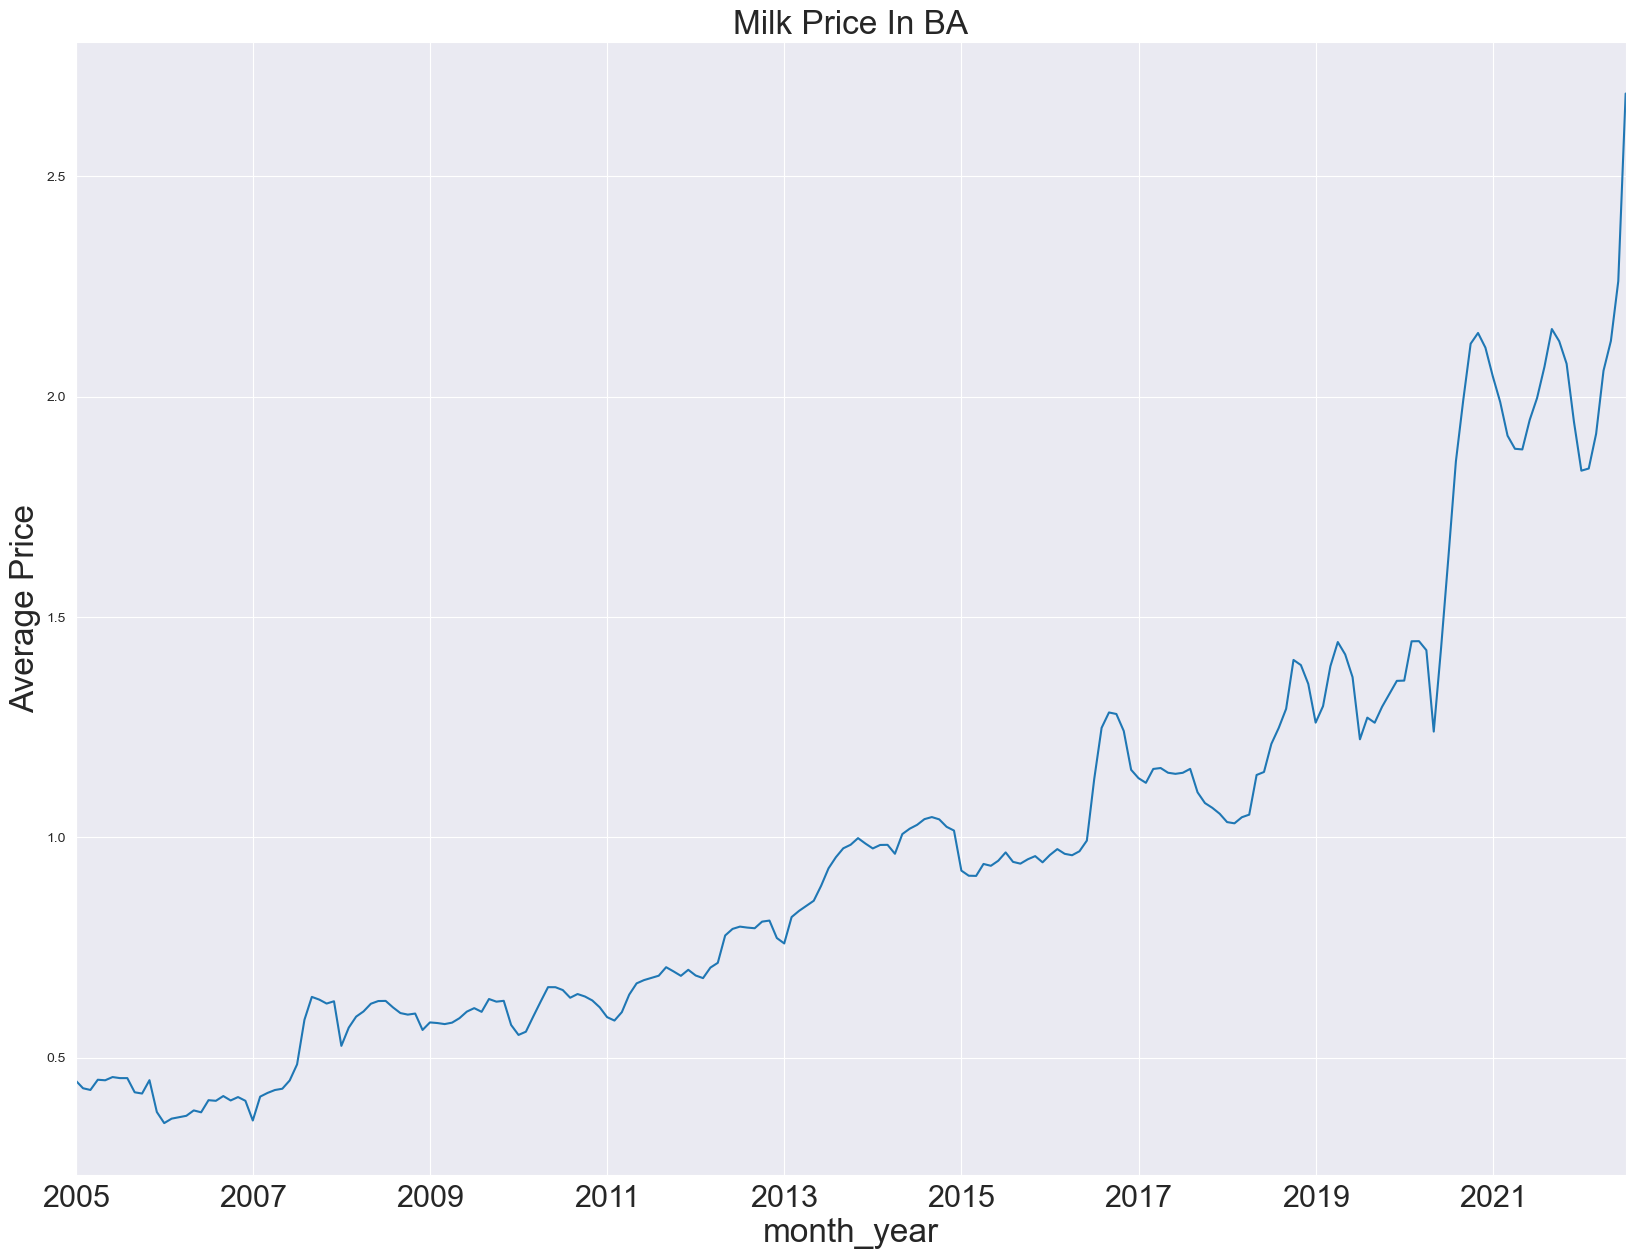

In [38]:
plot_average_price(df,'BA','average price')

<AxesSubplot:title={'center':'Milk Price In SP'}, xlabel='month_year', ylabel='Average Price'>

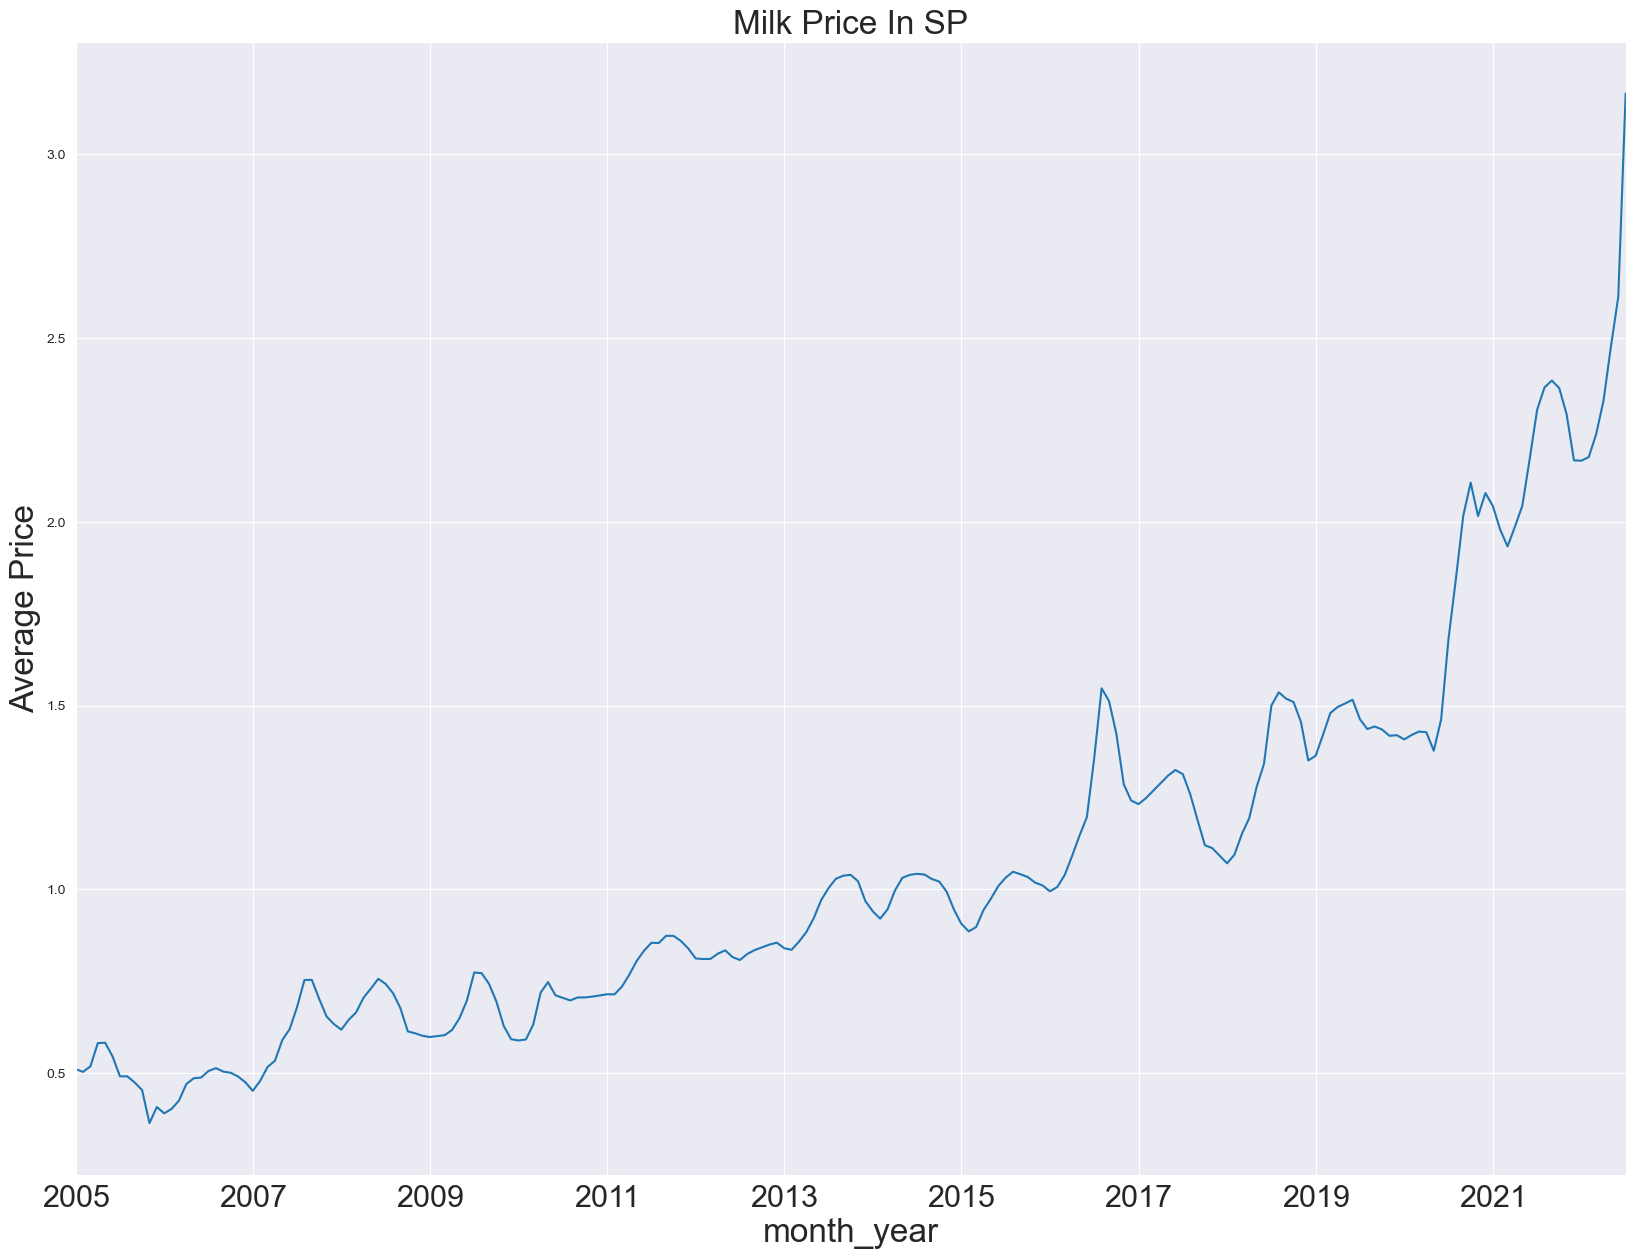

In [36]:
plot_average_price(df,'SP','average price')

<AxesSubplot:title={'center':'Milk Price In BRASIL'}, xlabel='month_year', ylabel='Average Price'>

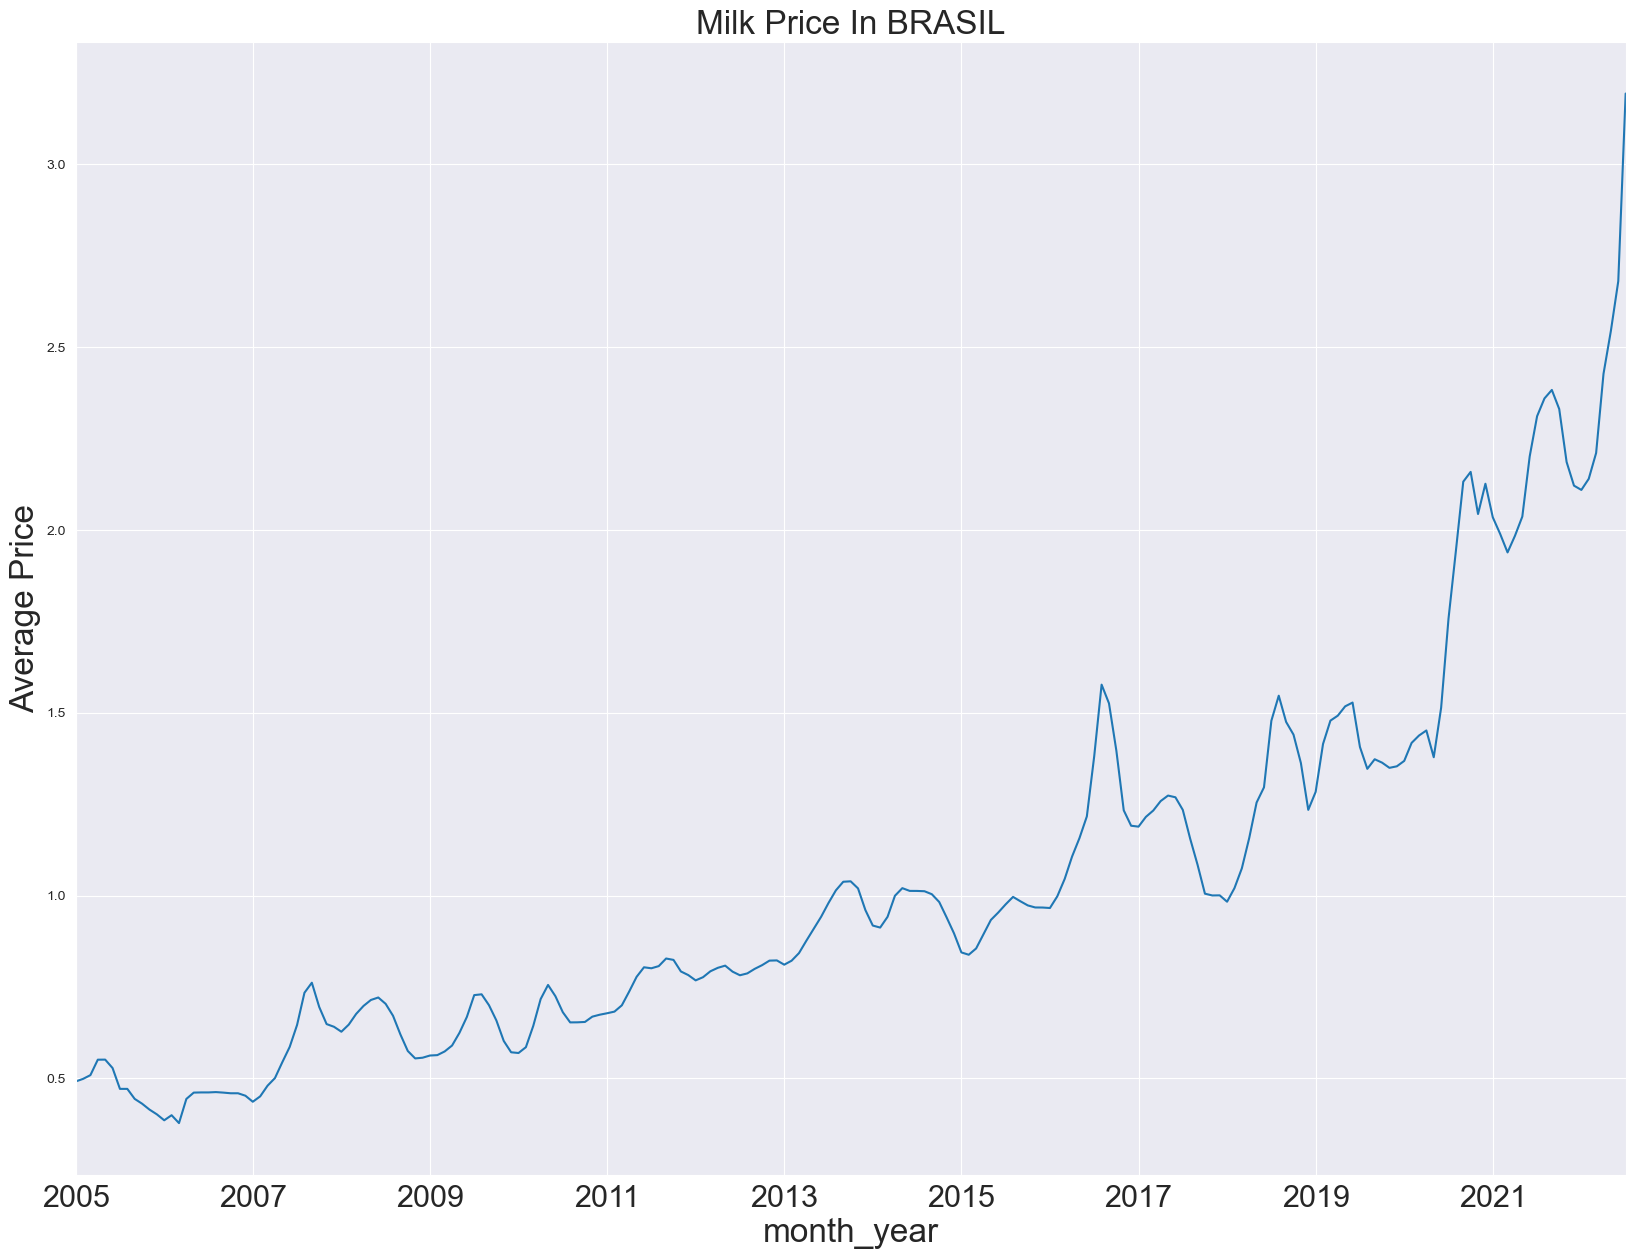

In [16]:
plot_average_price(df,'BRASIL','average price')